In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMouse = study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]).any()

duplicates = study_data_complete["Mouse ID"].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns = {"Mouse ID" : "Counts of Mouse ID"})
duplicates.head()

,Counts of Mouse ID
g989,13
a275,10
s185,10
u364,10
n304,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
study_data = study_data_complete.set_index("Mouse ID")

# check the mouse data for ID
g989 = study_data.loc["g989",:]
g989

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
#Create a clean dataframe by dropping the duplicate mouse by its ID.
study_data = study_data.reset_index()
study_data = study_data.drop_duplicates()
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete["Mouse ID"].unique())

249

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen
tumor_volume = study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean_tumor_volume = tumor_volume.mean()

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median_tumor_volume = tumor_volume.median()


# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
var_tumor_volume = tumor_volume.var()


# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
std_tumor_volume = tumor_volume.std()


# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem_tumor_volume = tumor_volume.sem()

# Convert to DataFrame
drug_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": var_tumor_volume,
    "Tumor Volume Std.Dev": std_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
    
    
})
# Preview DataFrame
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_tumor_df = study_data.groupby("Drug Regimen").agg(
Mean_Tumor_Volume = (("Tumor Volume (mm3)"), np.mean),
Median_Tumor_Volume = (("Tumor Volume (mm3)"), np.median),
Variance_Tumor_Volume = (("Tumor Volume (mm3)"), np.var),
Stdev_Tumor_Volume = (("Tumor Volume (mm3)"), np.std),
SEM_Tumor_Volume = (("Tumor Volume (mm3)"), st.sem),

)
drug_tumor_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Stdev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar And Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#drop duplicates
study_data = study_data.drop_duplicates("Mouse ID")
#get the count of mice
count = study_data["Drug Regimen"].value_counts()
measuresdf = pd.DataFrame({"Measures": count})

# list of unique drug regimens
unique = study_data["Drug Regimen"].unique()
# drug regimen as x-axis values for plotting
xlabel = "Drug Regimen"




study_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


Text(0.5, 1.0, 'Mouse Counts By Drug Regimen')

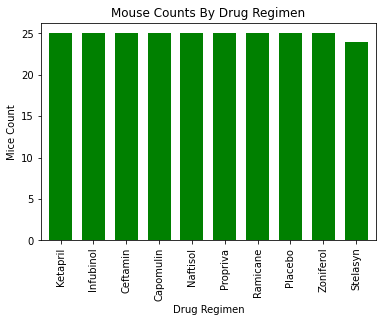

In [10]:
# plot the mouse counts for each drug using pandas
bar_plot = measuresdf['Measures'].plot.bar(width=0.7,color = "g", zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Mice Count")
bar_plot.set_title("Mouse Counts By Drug Regimen")


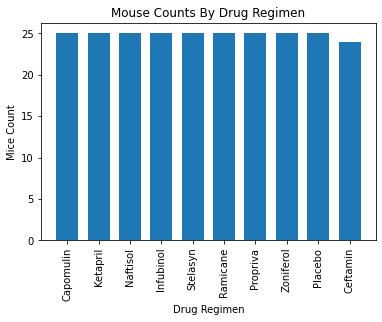

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(unique , count, width = 0.7)
# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)
# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mouse Counts By Drug Regimen")
plt.show()


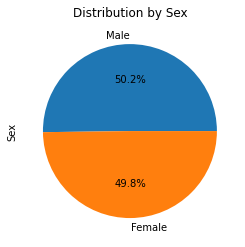

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Identify distribution of data by sex
data = study_data['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%.1f%%", startangle=0, title='Distribution by Sex')

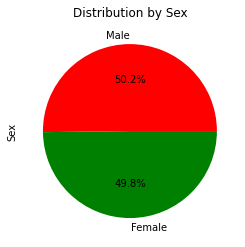

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Identify distribution of data by sex
data = study_data['Sex'].value_counts()
colors = ["Red", "Green"]
plt.ylabel("Sex")

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, colors = colors, autopct="%1.1f%%", startangle=0)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

Quartiles, Outliers and Boxplots

In [14]:
#Filter all the data value with the correct drug 
#create a filtered dataframe of the four drugs
filteredDf = study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Capomulin") | (study_data_complete["Drug Regimen"] == "Ramicane") 
                             | (study_data_complete["Drug Regimen"] == "Ceftamin") | (study_data_complete["Drug Regimen"] == "Infubinol"), :]

# Filter Capomulin Drug
filteredCapomulin= study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Capomulin"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filteredCapomulin = filteredCapomulin.sort_values("Timepoint", ascending= True)
filteredCapomulin = filteredCapomulin.drop_duplicates(subset="Mouse ID", keep='last')

# Filtered Ramicane Drug
filteredRamicane= study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Ramicane"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filteredRamicane= filteredRamicane.sort_values("Timepoint", ascending= True)
filteredRamicane= filteredRamicane.drop_duplicates(subset="Mouse ID", keep='last')

# Filtered Infubinol Drug
filteredInfubinal = study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Infubinol"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filteredInfubinal= filteredInfubinal.sort_values("Timepoint", ascending= True)
filteredInfubinal= filteredInfubinal.drop_duplicates(subset="Mouse ID", keep='last')

# Filtered Ceftamin Drug
filteredCeftamin = study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Ceftamin"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filteredCeftamin= filteredCeftamin.sort_values("Timepoint", ascending= True)
filteredCeftamin= filteredCeftamin.drop_duplicates(subset="Mouse ID", keep='last')

In [15]:
#Find the quartiles for Capomulin
quartiles = filteredCapomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

#get the lower and upper bounds
lowerBound = round(lowerq - (1.5*iqr),2)
upperBound = round(upperq + (1.5*iqr),2)

#print the information
print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {round(quartiles[0.5],2)} ")
print(f"Values below {lowerBound} could be outliers.")
print(f"Values above {upperBound} could be outliers.")

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


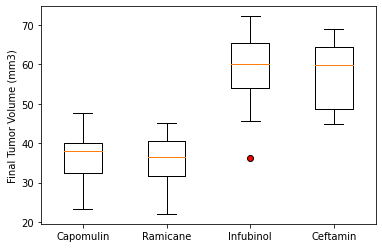

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#get the tumor volume for each type of drug
tumorCapom = filteredCapomulin['Tumor Volume (mm3)']
tumorRami = filteredRamicane['Tumor Volume (mm3)']
tumorInfu = filteredInfubinal['Tumor Volume (mm3)']
tumorCeft = filteredCeftamin['Tumor Volume (mm3)']
#create list for reference when making box plot
data= [tumorCapom, tumorRami, tumorInfu, tumorCeft]

#create box plot
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

Line And Scatter Plots

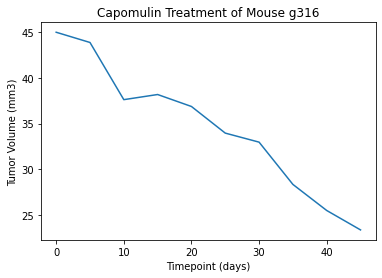

<Figure size 432x288 with 0 Axes>

In [17]:
# Single Mouse has an ID of s185. Filter fot this Mouse ID along with the drug Capomulin
filteredCapomulin = study_data_complete.loc[(study_data_complete["Drug Regimen"] == "Capomulin"), :]
filteredCapomulin =filteredCapomulin.loc[(filteredCapomulin["Mouse ID"] == "s185"), :]
filteredCapomulin= filteredCapomulin[["Timepoint","Tumor Volume (mm3)"]]
filteredCapomulin= filteredCapomulin.set_index("Timepoint")
# Plot the graph
filteredCapomulin["Tumor Volume (mm3)"].plot(kind="line")
plt.title("Capomulin Treatment of Mouse g316")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()

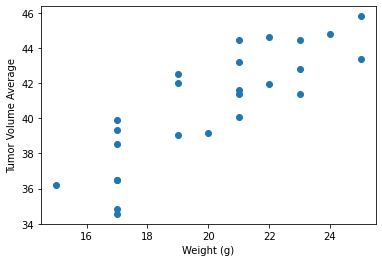

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = filteredDf.loc[(filteredDf["Drug Regimen"] == "Capomulin"), :]
capomulin = capomulin.set_index("Drug Regimen")

#use groupby for mouse id
filteredWeight = capomulin.groupby('Mouse ID')


#Calculate Tumor Volume mean
mean = (filteredWeight["Tumor Volume (mm3)"]).mean()

#Calculate Tumor Volume mean
mean2 = (filteredWeight["Weight (g)"]).mean()

# Creating a new DataFrame for scatter plot

plt.scatter(mean2, mean)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()

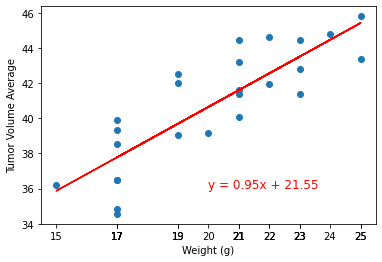

The correlation between both factors is 0.84


In [20]:
# Calculate the correlation coefficient & linear regression model for mouse weight & average tumor volume for the Capomulin 

# Get the previous calculated x & y values
capo_tumor_mean = (filteredWeight["Tumor Volume (mm3)"]).mean()
capo_weight_mean = (filteredWeight["Weight (g)"]).mean()

# Perform a linear regression on weight versus average tumor volume
slope, int, r, p, std_err = st.linregress(capo_weight_mean, capo_tumor_mean)
      
# Create equation of line to calculate average tumor volume
fit = slope * capo_weight_mean + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

# Plot the linear model on top of scatter plot 
plt.scatter(capo_weight_mean, capo_tumor_mean)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.plot(capo_weight_mean,fit,"r-")
#annotate the line just for fun
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.xticks(capo_weight_mean)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(capo_weight_mean,capo_tumor_mean)[0],2)
print(f'The correlation between both factors is {corr}')